# 1) Complex Numbers in Python

In [1098]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [1099]:
3 + 2j

(3+2j)

In [1100]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of variable is ', type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


In [1101]:
(2.75 + 3.69j) * (8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [1102]:
1.4 * math.e**5.32j

(0.799270785858235-1.1494199453957457j)

In [1103]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

# 2) Shapes Created by the Joukowski Transformation

In [1104]:
N = 50
x_start, x_end = -5.0, 5.0
y_start, y_end = -2.0, 2.0
theta=numpy.linspace(0, 2*numpy.pi, N)

In [1105]:
R = 1.5      # radius
z = R*math.e**(1j*theta)
c = 1

In [1106]:
def joukowski(zeta, constant):
    """
    Returns the Joukowski Transformation for z and c
    
    Parameters
    ----------
    zeta: 1D numpy array of floats
        2D complex plane
    constant: float
        constant parameter of joukowski transformation
        
    Returns
    -------
    J: 2D numpy array of floats
        joukowski transformation
    """
    J = zeta + constant**2/zeta
    return J

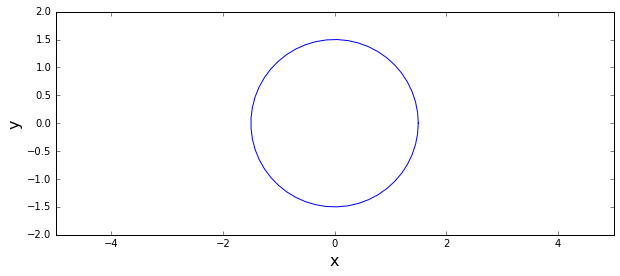

In [1107]:
size = 10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(z.real, z.imag);

In [1108]:
zeta = joukowski(z, c)

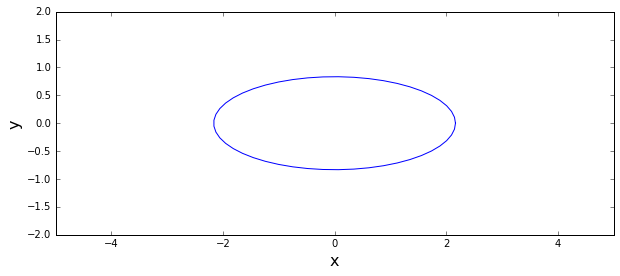

In [1109]:
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(zeta.real, zeta.imag)

## Here we get an ellipse

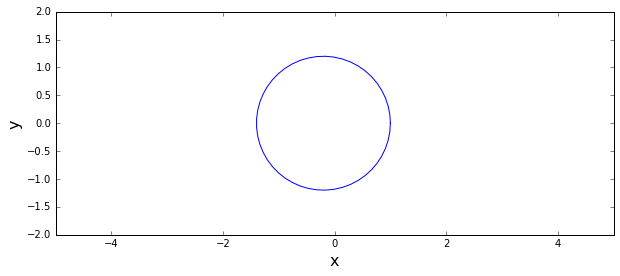

In [1110]:
# choose different radius
R = 1.2
z = R*math.e**(1j*theta)+(c-R)

# plot on z-plane
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(z.real, z.imag);

In [1111]:
eta = joukowski(z, c)

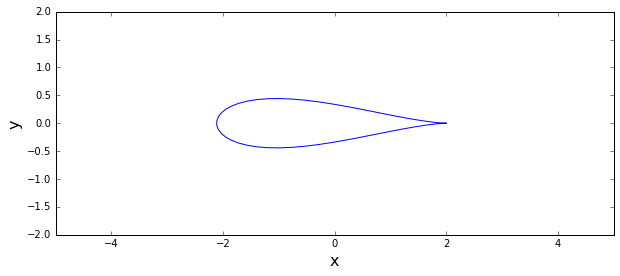

In [1112]:
#plot on eta plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(eta.real, eta.imag);

## Here we get a symmetric airfoil

In [1113]:
# define points for new center and new radius
delta_x = 0.1
delta_y = 0.1
R = math.sqrt((c+delta_x)**2+delta_y**2)

# redefine z
z = R*math.e**(1j*theta)-delta_x+delta_y*1j

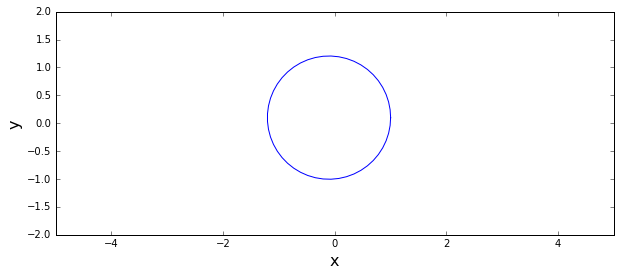

In [1114]:
#plot on z plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(z.real, z.imag);

In [1115]:
# redefine eta
eta = joukowski(z, c)

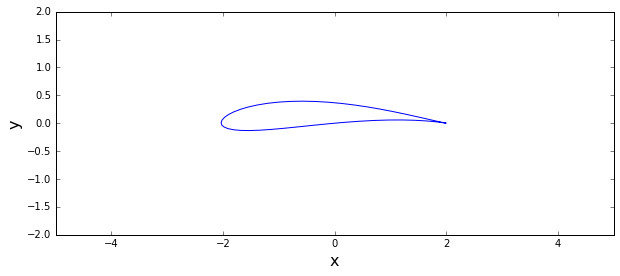

In [1116]:
# plot on eta plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(eta.real, eta.imag);

## Here we get a cambered airfoil

## The point ($\theta$=0 or 2$\pi$, R=1.2) corresponds to the trailing edge

# 3) Grid points on the z-plane using polar coordinates

In [1117]:
# end points of figure
x_start, x_end = -6.0, 6.0
y_start, y_end = -6.0, 6.0

# define radius, R, and meshgrid of r, theta
R = 1.15
r = numpy.linspace(R, 5, 100)
theta = numpy.linspace(0, 2*numpy.pi, 145)
r_mesh, theta_mesh = numpy.meshgrid(r,theta)

# define z with circle center at (-0.15, 0)
z = r_mesh*math.e**(1j*theta_mesh)-0.15

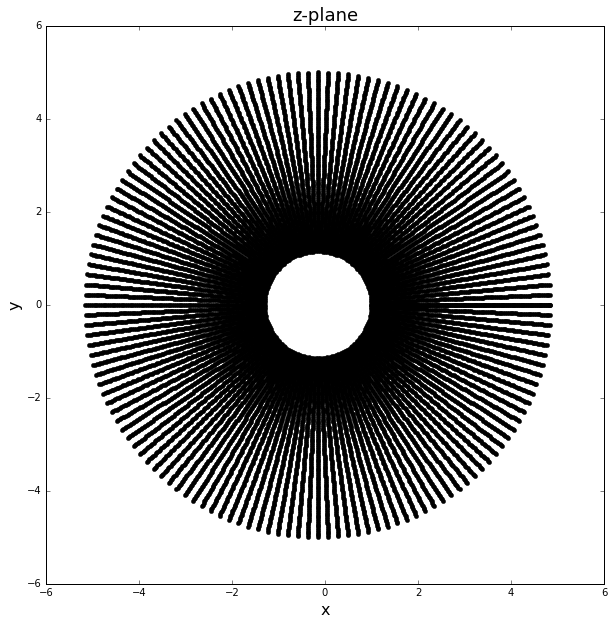

In [1118]:
# plot on z-plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('z-plane', fontsize = 18)
pyplot.scatter(z.real, z.imag, color='black', linewidth=0.25);

In [1119]:
# redefine eta
eta = joukowski(z, c)

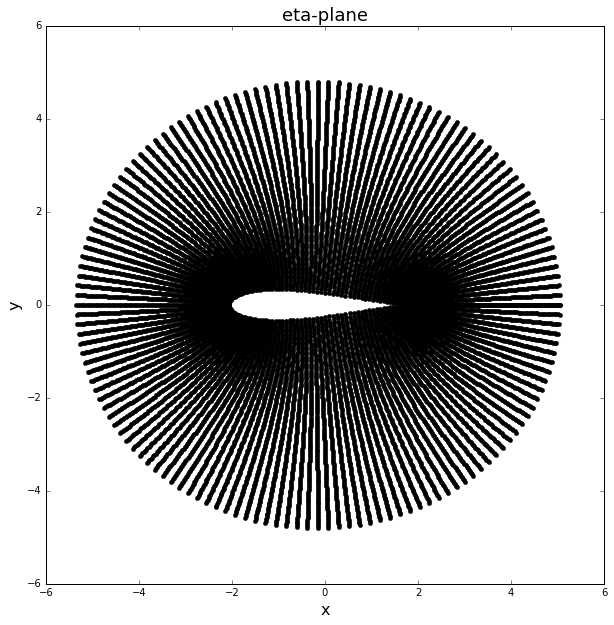

In [1120]:
# plot on eta plane
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('eta-plane', fontsize=18)
pyplot.scatter(eta.real, eta.imag, color='black', linewidth=0.25, linestyle='-');

# 4) Flow over a symmetric Joukowski airfoil with 0 angle of attack

In [1121]:
R = 1.15        # cylinder radius
kappa = 8.3     # doublet strength
r = numpy.linspace(R, 5, 100)
theta = numpy.linspace(0, 2*numpy.pi, 145)
r_mesh, theta_mesh = numpy.meshgrid(r,theta)
z = r_mesh*math.e**(1j*theta_mesh)-0.15

In [1122]:
u_inf = 1.0             # freestream speed
psi = (u_inf*r_mesh*numpy.sin(theta_mesh))*(1-(R**2/r_mesh)) # streamfunction

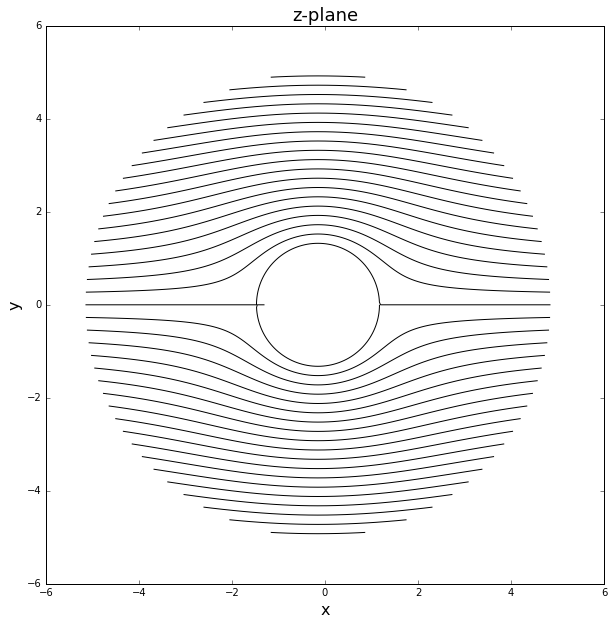

In [1123]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('z-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(z.real, z.imag, psi, 48, colors='black', linestyles='solid');

In [1124]:
eta = joukowski(z, c)

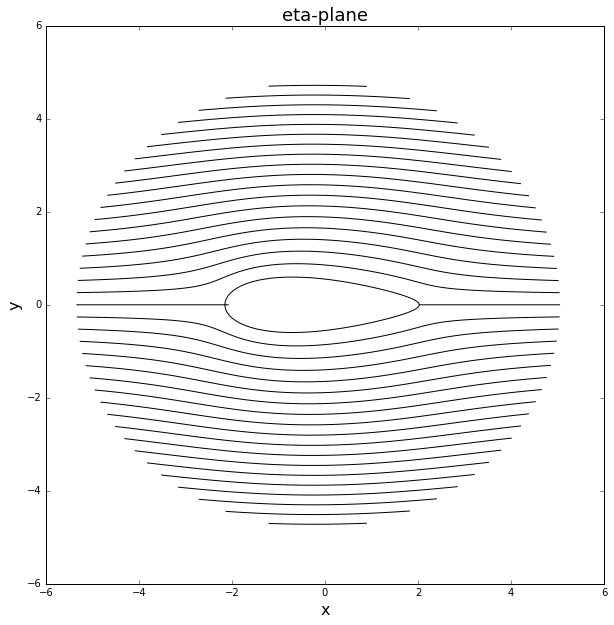

In [1125]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(eta.real, eta.imag, psi, 48, colors='black', linestyles='solid');

In [1126]:
# define velocities
u = (u_inf*numpy.cos(theta_mesh))*(1-(R**2/r_mesh**2))
v = - (u_inf*numpy.sin(theta_mesh))*(1+(R**2/r_mesh**2))

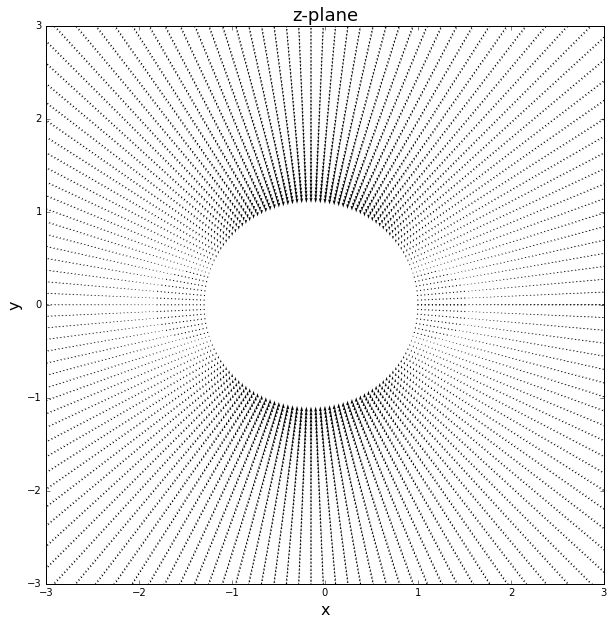

In [1127]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.title('z-plane', fontsize = 18)
pyplot.quiver(z.real, z.imag, u, v);

In [1128]:
eta = joukowski(z, c)

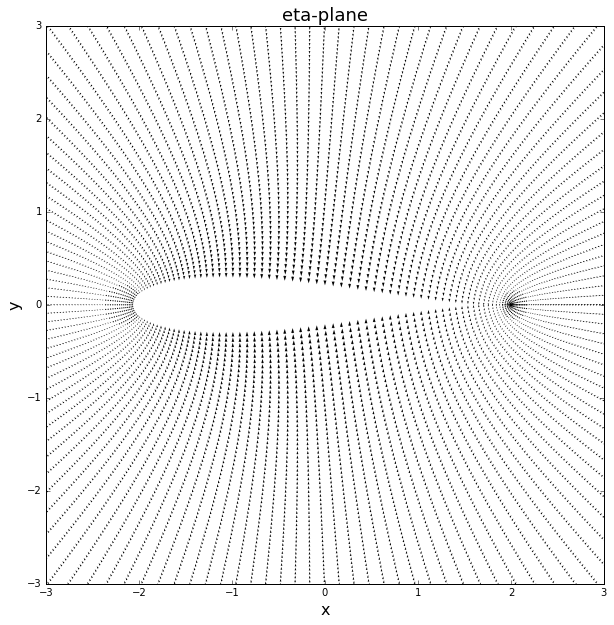

In [1129]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.quiver(eta.real, eta.imag, u, v);

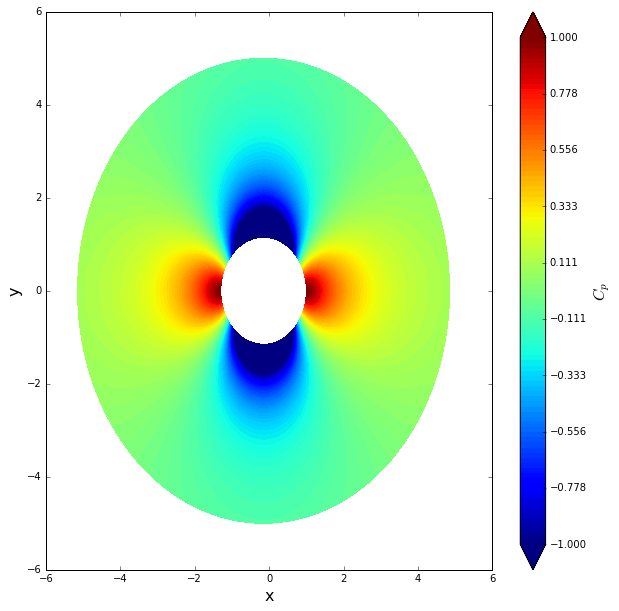

In [1130]:
cp = 1.0 -(u**2+v**2)/u_inf**2

#plot pressure coefficient
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

In [1131]:
eta = joukowski(z, c)

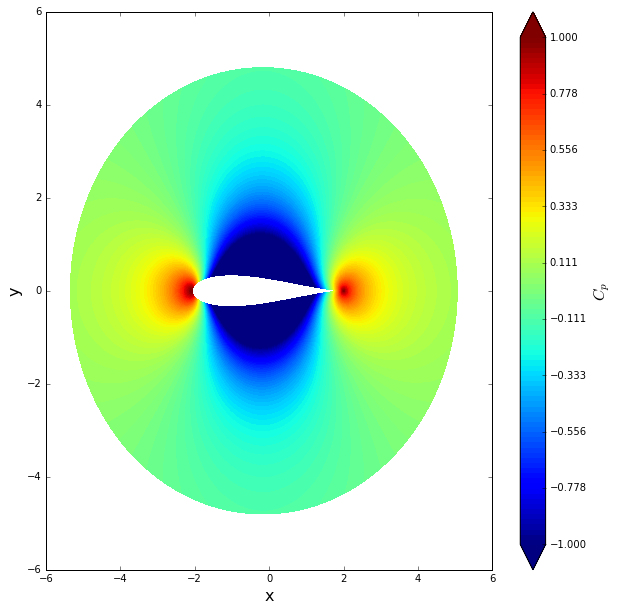

In [1132]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(eta.real, eta.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

## Questions

1) Doublet strength is 8.3

2) Velocity at the 62nd point on airfoil is

3) Minimum value of pressure coefficient is -3.0

In [1133]:
numpy.amin(cp)

-3.0

# 5) Flow over airfoil with non-zero AoA and no circulation

In [1134]:
# define Ange of Attack
AoA = numpy.deg2rad(340)

# define z'
z = r_mesh*math.e**(1j*theta_mesh)
z_prime = z*math.e**(-1j*AoA)-0.15

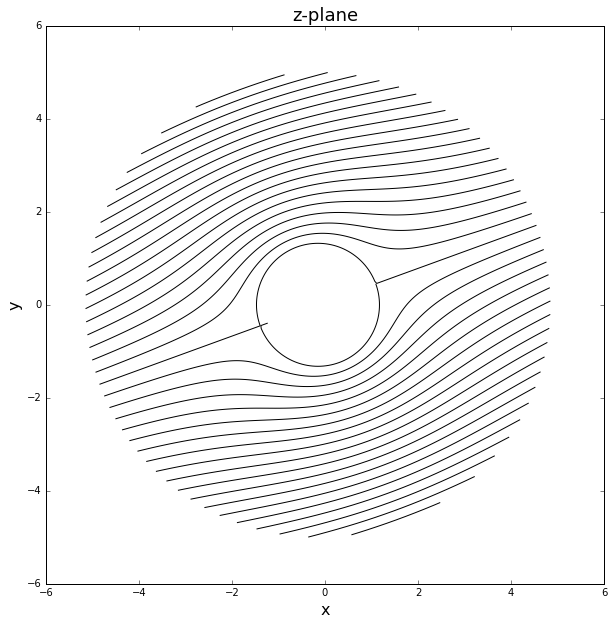

In [1135]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('z-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(z_prime.real, z_prime.imag, psi, 48, colors='black', linestyles='solid');

In [1136]:
eta = joukowski(z_prime, c)

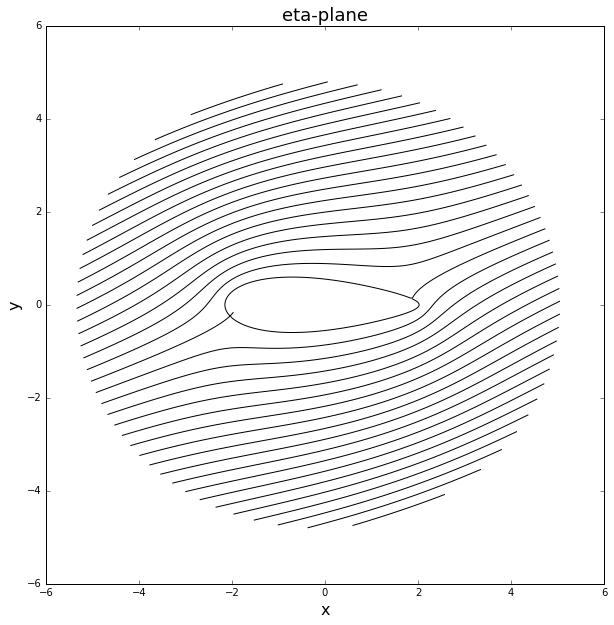

In [1137]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(eta.real, eta.imag, psi, 48, colors='black', linestyles='solid');

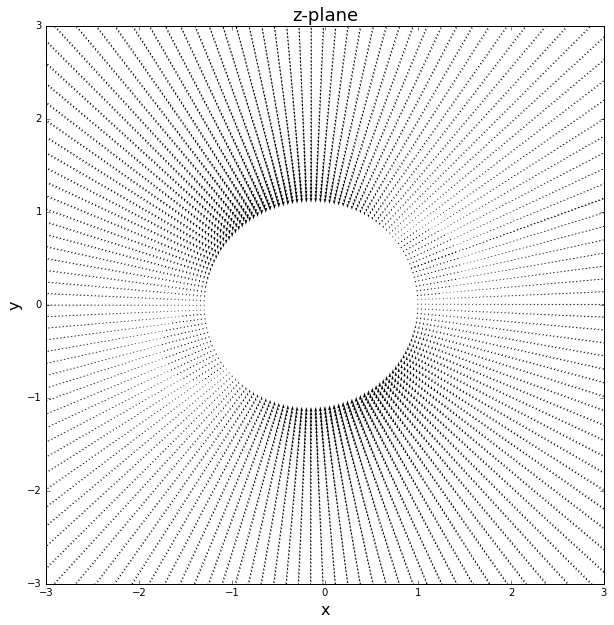

In [1138]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.title('z-plane', fontsize = 18)
pyplot.quiver(z_prime.real, z_prime.imag, u, v);

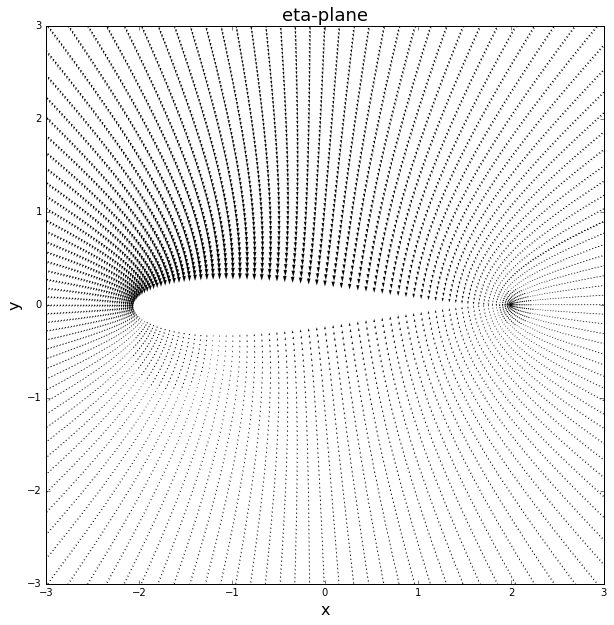

In [1191]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.title('eta-plane', fontsize = 18)
pyplot.quiver(eta.real, eta.imag, u, v);

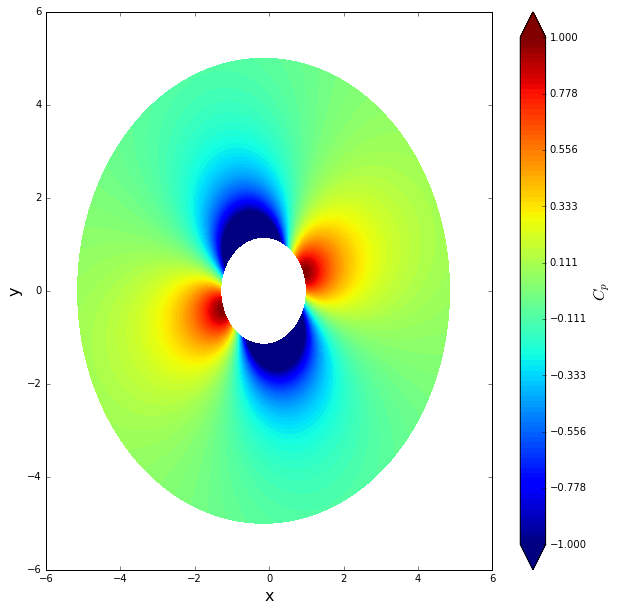

In [1140]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z_prime.real, z_prime.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

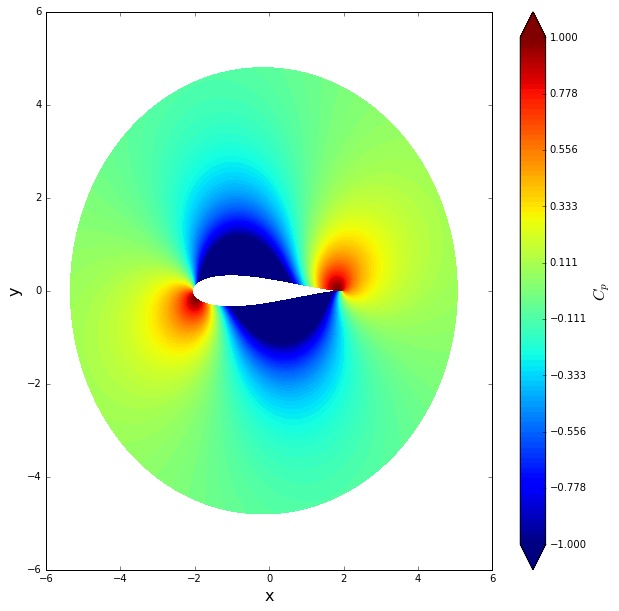

In [1141]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(eta.real, eta.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

## Questions

1) This is not a reasonable flow because we don't have circulation. Thus, there is no lift (pressure distribution is symmetric)

2) Stagnation points are located at [0,0] and [80,136]

3) Lift is 0

4) Drag is 0

5) Velocity at 50th point on airfoil is 

6) Pressure coefficient at 75th point on airfoil is 

In [1188]:
numpy.where(cp==numpy.amax(cp))

(array([ 80, 136]), array([0, 0]))

# 6) Flow with non-zero AoA and vortex

In [1173]:
gamma = 4.94
u = (u_inf*numpy.cos(theta_mesh))*(1-(R**2/r_mesh**2))
v = - (u_inf*numpy.sin(theta_mesh))*(1+(R**2/r_mesh**2)) - gamma/(2*numpy.pi*r_mesh)
psi_vortex = gamma/(2*numpy.pi)*numpy.log(r_mesh)
psi_doublet = (u_inf*r_mesh*numpy.sin(theta_mesh))*(1-(R**2/r_mesh))

psi = psi_vortex + psi_doublet

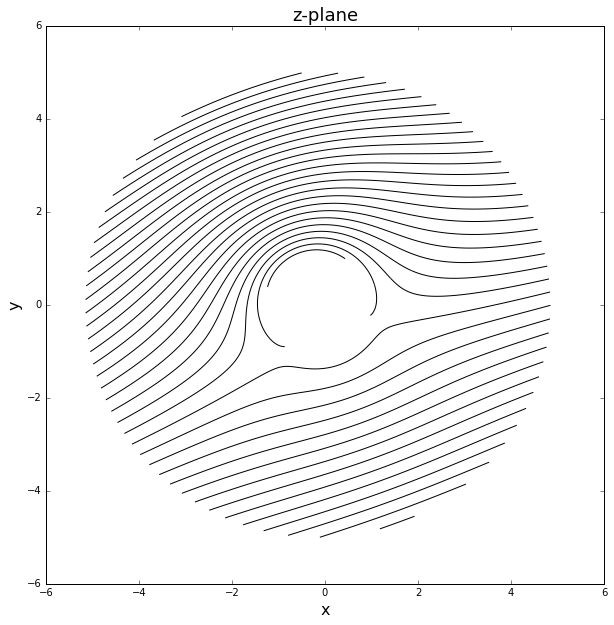

In [1174]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('z-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(z_prime.real, z_prime.imag, psi, 48, colors='black', linestyles='solid');

In [1159]:
eta = joukowski(z_prime, c)

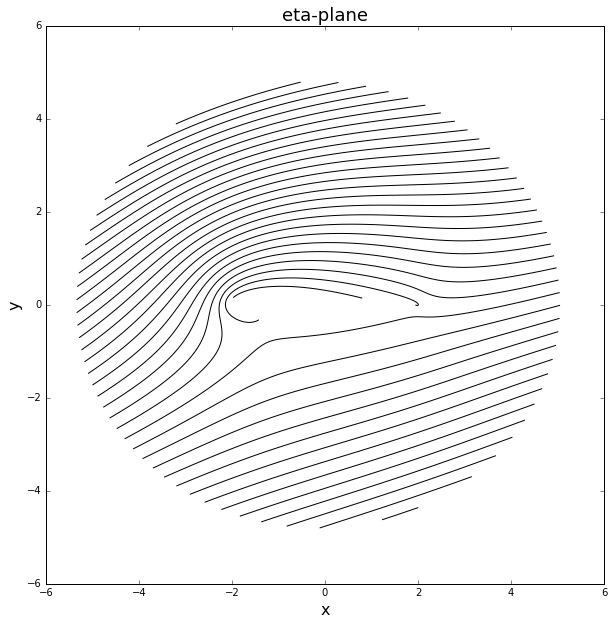

In [1189]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.contour(eta.real, eta.imag, psi, 48, colors='black', linestyles='solid');

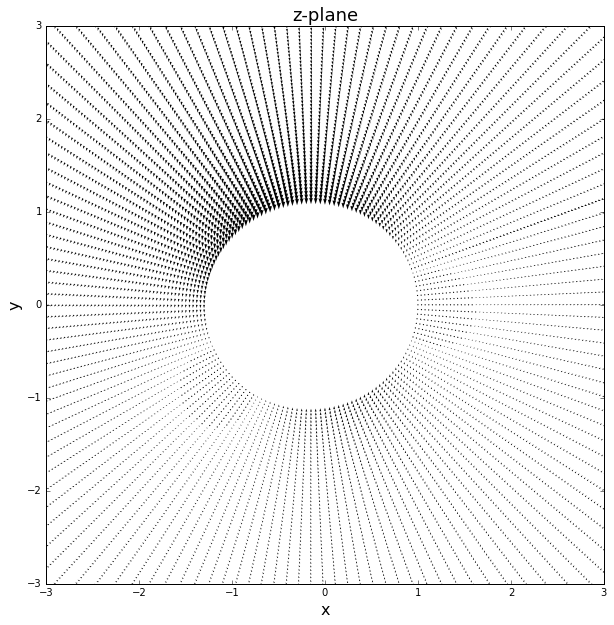

In [1147]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('z-plane', fontsize = 18)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(z_prime.real, z_prime.imag, u, v);

In [1148]:
eta = joukowski(z_prime, c)

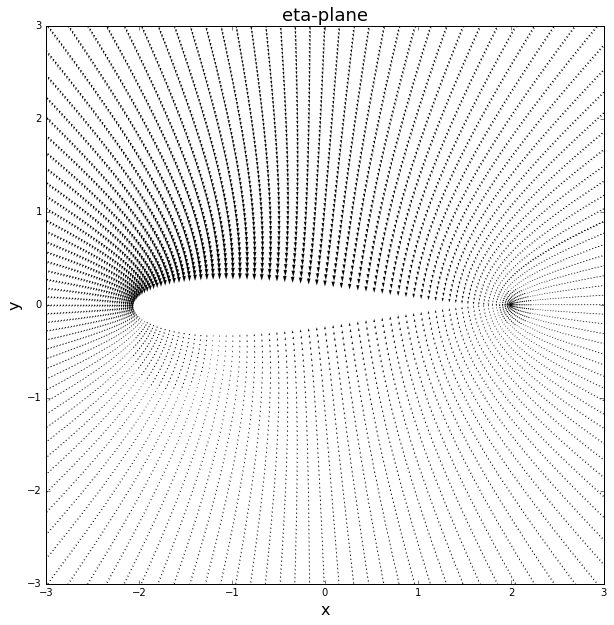

In [1190]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('eta-plane', fontsize = 18)
pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)
pyplot.quiver(eta.real, eta.imag, u, v);

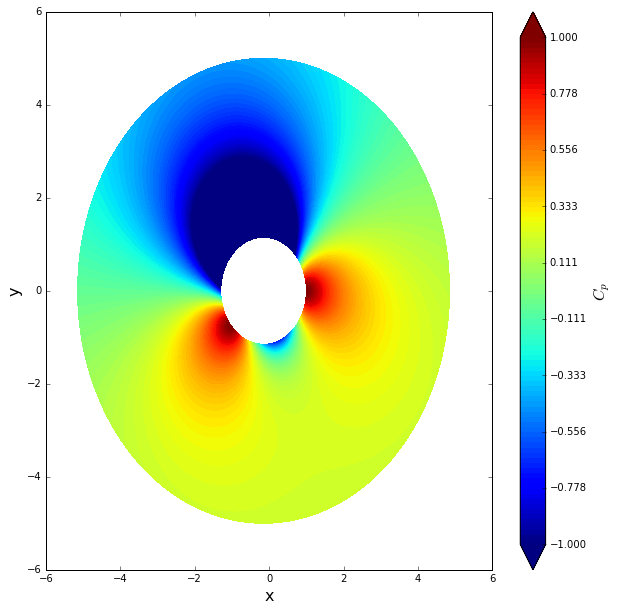

In [1162]:
cp = 1-(u**2+v**2)/u_inf**2

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z_prime.real, z_prime.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))

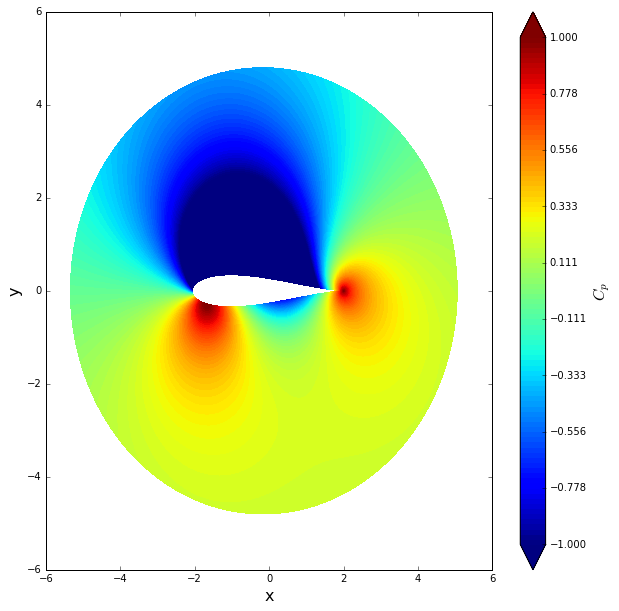

In [1164]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(eta.real, eta.imag, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize = 16)
cbar.set_ticks(numpy.linspace(-1.0, 1.0, 10))